In [2]:
import numpy as np 
import pylab as pl 
import networkx as nx 

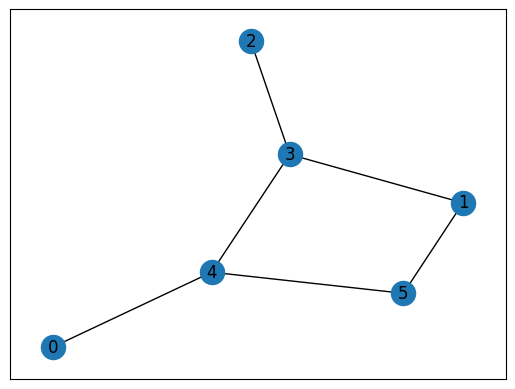

In [3]:
edges = [(0,4),(1,3),(1,5),(2,3),(3,4),(4,5)]
G = nx.Graph() 
G.add_edges_from(edges) 
pos = nx.spring_layout(G) 
nx.draw_networkx_nodes(G, pos) 
nx.draw_networkx_edges(G, pos) 
nx.draw_networkx_labels(G, pos) 
pl.show() 

In [4]:
MATRIX_SIZE = 6
M = np.matrix(np.ones(shape =(MATRIX_SIZE, MATRIX_SIZE))) 
M *= -1
goal = 5

for point in edges:
    if point[1] == goal:
        M[point] = 100
    else:
        M[point] = 0
    if point[0] == goal: 
        M[point[::-1]] = 100
    else: 
        M[point[::-1]]= 0
M[goal,goal] = 100

In [5]:
Q = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))
gamma = 0.8

In [6]:
M

matrix([[ -1.,  -1.,  -1.,  -1.,   0.,  -1.],
        [ -1.,  -1.,  -1.,   0.,  -1., 100.],
        [ -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,   0.,  -1.,   0.,  -1.],
        [  0.,  -1.,  -1.,   0.,  -1., 100.],
        [ -1.,   0.,  -1.,  -1.,   0., 100.]])

In [7]:
def random_action(actions):
    return np.random.choice(actions,1)[0]
def max_action(action_sel):
    return np.max(Q[action_sel,]>=0)
for i in range(100):
    current_state = np.random.randint(0, int(Q.shape[0]))
    current_row = M[current_state,]
    available_action = np.where(current_row>=0)[1]
    action_select = random_action(available_action)
    Q[current_state,action_select] = Q[current_state,action_select]+(gamma*max_action(action_select))

In [8]:
Q

matrix([[ 0. ,  0. ,  0. ,  0. , 15.2,  0. ],
        [ 0. ,  0. ,  0. ,  6.4,  0. ,  8. ],
        [ 0. ,  0. ,  0. , 12.8,  0. ,  0. ],
        [ 0. ,  4. ,  7.2,  0. ,  3.2,  0. ],
        [ 3.2,  0. ,  0. ,  4.8,  0. ,  1.6],
        [ 0. ,  6.4,  0. ,  0. ,  4.8,  2.4]])

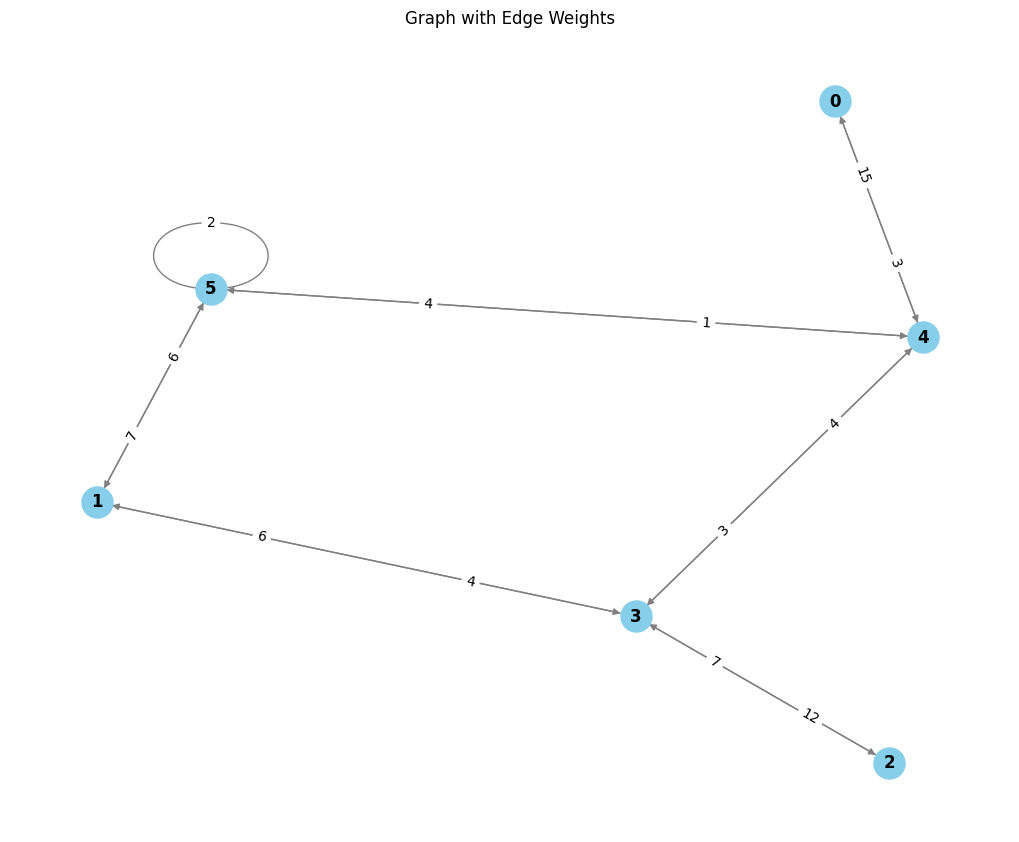

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

for i in range(6):
    for j in range(6):
        if Q[i, j] > 0:
            G.add_edge(i, j, weight=int(Q[i, j]))

pos = nx.spring_layout(G)
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_color="skyblue", node_size=500, font_size=12, font_weight="bold", edge_color="gray")
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, label_pos=0.3)

plt.title("Graph with Edge Weights")
plt.show()
